# Predicting categories with Logistic Regression

**Aim**: The aim of this notebook is to predict if a mobile transaction is fraudulent or not by using the logistic regression algorithm with scikit-learn.

## Table of contents

2. Implementing the logistic regression algorithm
3. Fine-tuning parameters using GridsearchCV
4. Scaling
5. Interpreting the results

## Package Requirements

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

In [2]:
# Reading in the dataset 

df = pd.read_csv('fraud_prediction.csv')

## Implementing the logistic regression algorithm

**Splitting the data into training and test sets**

In [3]:
#Creating the features 

features = df.drop('isFraud', axis = 1).values
target = df['isFraud'].values

In [4]:
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size = 0.3, random_state = 42, stratify = target)

**Creating and evaluating the base classifier**

In [5]:
#Initializing an logistic regression object

logistic_regression = linear_model.LogisticRegression()

#Fitting the model to the training and test sets

logistic_regression.fit(X_train, y_train)

LogisticRegression()

In [6]:
#Accuracy score of the logistic regression model

logistic_regression.score(X_test, y_test)

0.6124786741408725

## Fine tuning parameters using GridSearchCV

In [8]:
#Building the model with L1 penality 

#logistic_regression = linear_model.LogisticRegression(penalty='l1')
logistic_regression = linear_model.LogisticRegression(penalty='l2')

#Using GridSearchCV to search for the best parameter

grid = GridSearchCV(logistic_regression, {'C':[0.0001, 0.001, 0.01, 0.1, 10]})
grid.fit(X_train, y_train)

# Print out the best parameter

print("The most optimal inverse regularization strength is:", grid.best_params_)

The most optimal inverse regularization strength is: {'C': 0.0001}


In [10]:
#Initializing an logistic regression object

#logistic_regression = linear_model.LogisticRegression(C = 10, penalty = 'l1')
logistic_regression = linear_model.LogisticRegression(C = 10, penalty = 'l2')

#Fitting the model to the training and test sets

logistic_regression.fit(X_train, y_train)

LogisticRegression(C=10)

In [11]:
#Accuracy score of the logistic regression model

logistic_regression.score(X_test, y_test)

0.6124786741408725

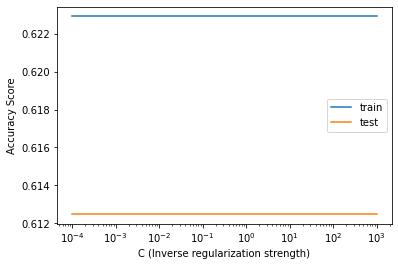

In [15]:
train_errors = []
test_errors = []

C_list = [0.0001, 0.001, 0.01, 0.1, 10, 100, 1000]

# Evaluate the training and test classification errors for each value of C

for value in C_list:
    
    # Create LogisticRegression object and fit
    #logistic_regression = linear_model.LogisticRegression(C= value, penalty = 'l1')
    logistic_regression = linear_model.LogisticRegression(C= value, penalty = 'l2')
    logistic_regression.fit(X_train, y_train)
    
    # Evaluate error rates and append to lists
    train_errors.append(logistic_regression.score(X_train, y_train) )
    test_errors.append(logistic_regression.score(X_test, y_test))
    
# Plot results
plt.semilogx(C_list, train_errors, C_list, test_errors)
plt.legend(("train", "test"))
plt.ylabel('Accuracy Score')
plt.xlabel('C (Inverse regularization strength)')
plt.show()

## Scaling your data

In [17]:
#Setting up the scaling pipeline 

#pipeline_order = [('scaler', StandardScaler()), ('logistic_reg', linear_model.LogisticRegression(C = 10, penalty = 'l1'))]
pipeline_order = [('scaler', StandardScaler()), ('logistic_reg', linear_model.LogisticRegression(C = 10, penalty = 'l2'))]

pipeline = Pipeline(pipeline_order)

#Fitting the classfier to the scaled dataset 

logistic_regression_scaled = pipeline.fit(X_train, y_train)

#Extracting the score 

logistic_regression_scaled.score(X_test, y_test)

/Users/raultoscanomiranda/opt/anaconda3/envs/mi_virtual_env_3_8/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.99719717280039

## Interpreting the results of the model 

In [18]:
#Printing out the coefficients of each variable 

print(logistic_regression.coef_)

[[ 3.90394011e-06 -7.76083932e-09 -1.10495047e-05  1.65300486e-05
  -1.87434594e-05  6.58054800e-07 -7.85856890e-07 -6.84138593e-10
  -1.31079747e-09 -1.09138456e-10 -2.07992783e-09 -1.21507505e-09]]


In [19]:
#Printing out the intercept of the model

print(logistic_regression.intercept_)

[-5.36053015e-09]
